# What are we doing?
Predict who survived (1) or died (0) based on input information.

Raw data is also availble on wikipedia.

In [209]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import collections
from random import shuffle, randint

from sklearn.cross_validation import train_test_split
from sklearn import svm
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

Getting errors with sklearn? 

Scikit-learn requires:
<li>Python (>= 2.6 or >= 3.3),
<li>NumPy (>= 1.6.1),
<li>SciPy (>= 0.9).

Try:
conda install scikit-learn
OR
pip install -U scikit-learn

Still got probs?

python -m pip install --upgrade pip
pip install --user numpy scipy matplotlib ipython jupyter pandas sympy nose

In [210]:
#read in csv file
data = pd.read_csv("iris.csv", header=None)
trainPercent = 50 #must be between 0 and 100
validationPercent = 35
numberRowsOfEachClass = 50
data.head() #look at first 5 rows of the data

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Useful functions
<li>date_frame.head()
<li>data.columns
<li>data_frame.shape


In [211]:
#Grab desired inputs to test one. Build a dataframe from them.
dataInputs= data.loc[:,0:3]
dataInputs.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [212]:
#Grab the expected outputs. (This is supervised learning)
y1=[]
y2=[]
y3=[]
for i in range(0,numberRowsOfEachClass):
    y1.append([1,0,0]);#setosa
    y2.append([0,1,0]);#versicolor
    y3.append([0,0,1]);#virginica
expectedOutput=np.concatenate([y1,y2,y3])


# Breakdown the input data into test and train

In [213]:
#Hint: use train_test_split
inputTrain, inputTest, expectedOutputTrain, expectedOutputTest = train_test_split(dataInputs, expectedOutput, train_size = trainPercent/100, random_state=42)
validateTest, inputTrain, validateOutputTest, expectedOutputTrain = train_test_split(inputTrain, expectedOutputTrain, train_size = validationPercent/100, random_state=42)
#inputTest.head()
print(validateTest.shape)
print(validateOutputTest.shape)
print(inputTrain.shape)
print(expectedOutputTrain.shape)
print(inputTest.shape)
print(expectedOutputTest.shape)

def getClassCountTotals(output):
    d = collections.OrderedDict()
    for a in output:
        t = tuple(a)
        if t in d:
            d[t] += 1
        else:
            d[t] = 1

    result = []
    for (key, value) in d.items():
        result.append(list(key) + [value])

    B = np.asarray(result)
    print(B)
    for Bi in B:
        if Bi[0] == 1:
            setosaTotal = Bi[3]
        elif Bi[1] == 1:
            versicolorTotal = Bi[3]
        elif Bi[2] == 1:
            virginicaTotal = Bi[3]
    return setosaTotal, versicolorTotal, virginicaTotal
print(expectedOutputTest)
print("ValidateTest",validateOutputTest)
setosaTotal, versicolorTotal, virginicaTotal = getClassCountTotals(expectedOutputTest)
validationCounts = getClassCountTotals(validateOutputTest)
print(setosaTotal)
print(versicolorTotal)
print(virginicaTotal)

(26, 4)
(26, 3)
(49, 4)
(49, 3)
(75, 4)
(75, 3)
[[0 1 0]
 [1 0 0]
 [0 0 1]
 [0 1 0]
 [0 1 0]
 [1 0 0]
 [0 1 0]
 [0 0 1]
 [0 1 0]
 [0 1 0]
 [0 0 1]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [0 0 1]
 [0 1 0]
 [0 1 0]
 [0 0 1]
 [1 0 0]
 [0 0 1]
 [1 0 0]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [1 0 0]
 [1 0 0]
 [0 0 1]
 [0 1 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [0 0 1]
 [0 1 0]
 [0 1 0]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [0 0 1]
 [0 0 1]
 [0 1 0]
 [0 0 1]
 [0 1 0]
 [0 0 1]
 [0 1 0]
 [1 0 0]
 [0 0 1]
 [0 1 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [0 0 1]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [1 0 0]
 [0 1 0]
 [0 0 1]
 [1 0 0]
 [0 1 0]
 [0 0 1]
 [1 0 0]
 [0 0 1]
 [0 0 1]
 [0 1 0]]
ValidateTest [[0 1 0]
 [1 0 0]
 [0 1 0]
 [1 0 0]
 [0 1 0]
 [0 0 1]
 [0 1 0]
 [0 0 1]
 [1 0 0]
 [0 0 1]
 [0 0 1]
 [0 1 0]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [1 0 0]
 [0 1 0]
 [0 0 1]
 [0 1 0]
 [0 1 0]
 [0 0 1]
 [0 1 0]
 [0 0 1]]
[[ 0  1  0 23]
 [ 1  0  0 29

# Get weight matrix

In [214]:
#Build our least squares classifier for 2 classes
D = inputTrain.shape[1] + 1 #num of attributes, +1 is for the intercept (column of 1s)
K = expectedOutput.shape[1]

In [215]:
expectedOutputTrain = np.asarray(expectedOutputTrain)
expectedOutputTest = np.asarray(expectedOutputTest)
inputTrain = np.asarray(inputTrain)
inputTest = np.asarray(inputTest)
validateTest = np.asarray(validateTest)
validateOutputTest = np.asarray(validateOutputTest)

In [216]:
sum1 = 0
sum2 = 0
def createWeightMatrix(x, y, lmbda):
    numRows = x.shape[0]
    print("y", y)
    new_col = np.ones((numRows,1))
    augmentedX = np.c_[new_col, x]
    sum1 = np.dot(augmentedX.T, augmentedX) + lmbda
    sum2 = np.dot(augmentedX.T, y)
    W = np.dot(np.linalg.inv(sum1), sum2)
    return W

In [217]:
def classificationTest(xTest, yTest, W, isValidating):  
    returnVals = []
    total = yTest.shape[0]
    predicted = np.zeros((total, K))
    i=0
    setosaCorrect=versicolorCorrect=virginicaCorrect=totalCorrect=0
    correctPredictionCol = [0]*total
    for i in range(total):      
        x = xTest[i]        
        x = np.append(1,x)         
        x = x.reshape(1,D)        
        values = np.dot(W.T,x.T)
        values = values.T
        values = values.flatten()
        maxIndex = np.argmax(values)
        if yTest[i][maxIndex] == 1:
            if maxIndex == 0:
                setosaCorrect += 1
            elif maxIndex == 1:
                versicolorCorrect += 1
            elif maxIndex == 2:
                virginicaCorrect += 1
            correctPredictionCol[i] = 1
        predicted[i][maxIndex] = 1
    totalCorrect = setosaCorrect + versicolorCorrect + virginicaCorrect
    print(totalCorrect)
    totalAccuracy=totalCorrect/float(total)*100
    if isValidating == False:
        setosaAccuracy = setosaCorrect/float(setosaTotal)*100
        versicolorAccuracy = versicolorCorrect/float(versicolorTotal)*100
        virginicaAccuracy = virginicaCorrect/float(virginicaTotal)*100
        print("setosa misclassification error = ", 100 - setosaAccuracy)
        print("versicolor misclassification error = ", 100 - versicolorAccuracy)
        print("virginica misclassification error = ", 100 - virginicaAccuracy)
    else:
        setosaAccuracy = setosaCorrect/float(validationCounts[0])*100
        versicolorAccuracy = versicolorCorrect/float(validationCounts[1])*100
        virginicaAccuracy = virginicaCorrect/float(validationCounts[2])*100
        print("setosa misclassification error = ", 100 - setosaAccuracy)
        print("versicolor misclassification error = ", 100 - versicolorAccuracy)
        print("virginica misclassification error = ", 100 - virginicaAccuracy)
    print("total misclassification error = ", 100 - totalAccuracy)
    print(total)
    returnVals.append(100-totalAccuracy)
    returnVals.append(predicted)
    returnVals.append(correctPredictionCol)
    return returnVals

In [218]:
#cross validation
lambdaValues = [1, 0,.1 , .3, .01, .03, .001, .003, .0001, .0003]
totalErrorValues  = []
lambdaIndexOfMinError = -1
minError = 101
i = 0
for l in lambdaValues :
    print("lambda val?",l)
    W=0
    W = createWeightMatrix(inputTrain, expectedOutputTrain, l)
    print("W",W)
    error, predictedClasses, correctPredCol = classificationTest(validateTest, validateOutputTest, W, True)
    totalErrorValues.append(error)
    print("error ",error)    
    if(error < minError):
        minError = error
        lambdaIndexOfMinError = i
    i+=1
print("smalled index of error for lambda...", lambdaIndexOfMinError)
Wtest = createWeightMatrix(inputTrain, expectedOutputTrain, lambdaValues[lambdaIndexOfMinError])

lambda val? 1
y [[0 1 0]
 [0 1 0]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [0 0 1]
 [0 1 0]
 [1 0 0]
 [1 0 0]
 [0 0 1]
 [0 1 0]
 [0 0 1]
 [1 0 0]
 [0 0 1]
 [0 1 0]
 [1 0 0]
 [0 0 1]
 [1 0 0]
 [0 0 1]
 [0 1 0]
 [1 0 0]
 [0 0 1]
 [0 0 1]
 [0 1 0]
 [0 1 0]
 [1 0 0]
 [1 0 0]
 [0 0 1]
 [0 1 0]
 [0 0 1]
 [1 0 0]
 [0 1 0]
 [0 0 1]
 [0 0 1]
 [1 0 0]
 [0 0 1]
 [1 0 0]
 [0 1 0]
 [1 0 0]
 [0 1 0]
 [0 0 1]
 [0 1 0]
 [1 0 0]
 [1 0 0]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [1 0 0]
 [0 1 0]]
W [[-0.04112579  1.17726214 -0.89333206]
 [ 0.12691708 -0.02285663 -0.00218325]
 [ 0.22235314 -0.36284261  0.20948297]
 [-0.26527902  0.31666948 -0.00923328]
 [-0.0359417  -0.68006213  0.53933641]]
20
setosa misclassification error =  0.0
versicolor misclassification error =  36.36363636363637
virginica misclassification error =  20.0
total misclassification error =  23.076923076923066
26
error  23.076923076923066
lambda val? 0
y [[0 1 0]
 [0 1 0]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [0 0 1]
 [0 1 0]
 [1 0 0]
 [1 0 0]
 [0 0 1]
 [0 1 0]
 [0 0 1]


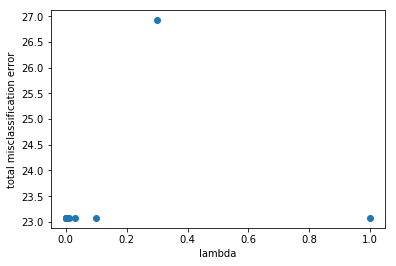

In [219]:
plt.plot(lambdaValues, totalErrorValues, 'o')
plt.xlabel('lambda')
plt.ylabel('total misclassification error')
plt.draw()
plt.show()

In [220]:
#testing
error, predictedClasses, correctPredictionCol = classificationTest(inputTest, expectedOutputTest, Wtest, False)
print(error)

63
setosa misclassification error =  0.0
versicolor misclassification error =  39.13043478260869
virginica misclassification error =  13.043478260869563
total misclassification error =  16.0
75
16.0


In [221]:
actual = pd.DataFrame(expectedOutputTest)
predictedDF = pd.DataFrame(predictedClasses)
correct = pd.DataFrame(correctPredictionCol)
frames = [predictedDF, actual, correct]
modelTest = pd.concat(frames, axis=1)
modelTest.columns = ["Predicted","Predicted", "Predicted", "Actual", "Actual", "Actual", "Correct"]
modelTest

,Predicted,Predicted,Predicted,Actual,Actual,Actual,Correct
0,0.0,1.0,0.0,0,1,0,1
1,1.0,0.0,0.0,1,0,0,1
2,0.0,0.0,1.0,0,0,1,1
3,0.0,0.0,1.0,0,1,0,0
4,0.0,1.0,0.0,0,1,0,1
5,1.0,0.0,0.0,1,0,0,1
6,0.0,0.0,1.0,0,1,0,0
7,0.0,0.0,1.0,0,0,1,1
8,0.0,1.0,0.0,0,1,0,1
9,0.0,1.0,0.0,0,1,0,1


In [222]:
actualAsClassNumber = [0]*expectedOutputTest.shape[0]
predictedAsClassNumber = [0]*expectedOutputTest.shape[0]
for i in range(expectedOutputTest.shape[0]):
    actualAsClassNumber[i] = expectedOutputTest[i].tolist().index(1)
    predictedAsClassNumber[i] = predictedClasses[i].tolist().index(1.0)
confusion_matrix(actualAsClassNumber, predictedAsClassNumber)

array([[29,  0,  0],
       [ 0, 14,  9],
       [ 0,  3, 20]])

In [223]:
clf = svm.SVC(kernel='linear', C=1)
expectedOutputSVM = data.loc[:,4]
inputTrain, inputTest, expectedOutputTrain, expectedOutputTest = train_test_split(dataInputs, expectedOutputSVM, train_size = trainPercent/100, random_state=42)
clf.fit(inputTrain, expectedOutputTrain)
accuracy = clf.score(inputTest, expectedOutputTest)
print(accuracy)

1.0


In [224]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.multiclass import OneVsRestClassifier

In [225]:
#SVM One vs all classifier
clf = Pipeline([
    ('clf', OneVsRestClassifier(LinearSVC()))])
model = clf.fit(inputTrain, expectedOutputTrain)
accuracy = clf.score(inputTest, expectedOutputTest)
print(accuracy)
svmPredicted = model.predict(inputTest)
confusion_matrix(expectedOutputTest,svmPredicted)

0.986666666667


array([[29,  0,  0],
       [ 0, 23,  0],
       [ 0,  1, 22]])